# Example Jupyter notebook to work with the data

# Read in and plot the Apollo 12 Grade A catalog

In [1]:
!pip install obspy

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/My Drive/NASA Hackathon'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/.shortcut-targets-by-id/1UMmU471yz6-G3Kaj_hpo8AOv1dRT_c5i/NASA Hackathon


Let's take a look at the training data for the lunar dataset. In addition to the data itself, we include a catalog that will tell you which events happen when in the data. The catalog includes the name of the file, the absolute time, the relative time in seconds (relative to the start of the file), the event ID (evid), and the type of moonquake. The types of moonquakes include impacts, deep moonquakes, and shallow moonquakes. You do not have to worry about predicting the type of moonquakes, that's just fun information for you to know!

**Note**: For your prediction, feel free to include either the absolute time or relative time, just make sure to mark it using the same header in the CSV file so we can easily score it!

In [4]:
cat_directory = './seismic_detection/data/lunar/training/catalogs/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)
cat

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19T20:25:00.000000,73500.0,evid00002,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25T03:32:00.000000,12720.0,evid00003,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26T20:17:00.000000,73020.0,evid00004,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25T01:14:00.000000,4440.0,evid00006,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26T14:29:00.000000,52140.0,evid00007,deep_mq
...,...,...,...,...,...
71,xa.s12.00.mhz.1974-10-14HR00_evid00156,1974-10-14T17:43:00.000000,63780.0,evid00156,impact_mq
72,xa.s12.00.mhz.1975-04-12HR00_evid00191,1975-04-12T18:15:00.000000,65700.0,evid00191,impact_mq
73,xa.s12.00.mhz.1975-05-04HR00_evid00192,1975-05-04T10:05:00.000000,36300.0,evid00192,impact_mq
74,xa.s12.00.mhz.1975-06-24HR00_evid00196,1975-06-24T16:03:00.000000,57780.0,evid00196,impact_mq


## Select a detection

Let's pick the first seismic event in the catalog and let's take a look at the absolute time data. The way we show it here is by using pandas `.iloc` and datetime `.strptime`. We are going to keep the format shown in the absolute time header, which is `'%Y-%m-%dT%H:%M:%S.%f'`

In [5]:
row = cat.iloc[68]
arrival_time = datetime.strptime(row['time_abs(%Y-%m-%dT%H:%M:%S.%f)'],'%Y-%m-%dT%H:%M:%S.%f')
arrival_time

datetime.datetime(1974, 7, 6, 14, 14)

In [6]:
# If we want the value of relative time, we don't need to use datetime
arrival_time_rel = row['time_rel(sec)']
arrival_time_rel

51240.0

In [7]:
# Let's also get the name of the file
test_filename = row.filename
test_filename

'xa.s12.00.mhz.1974-07-06HR00_evid00151'

## Read the CSV file corresponding to that detection

We will now find the csv data file corresponding to that time and plot it!

In [8]:
data_directory = './seismic_detection/data/lunar/training/data/S12_GradeA/'
csv_file = f'{data_directory}{test_filename}.csv'
data_cat = pd.read_csv(csv_file)
data_cat

,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
0,1974-07-06T00:00:00.193000,0.000000,-5.822985e-16
1,1974-07-06T00:00:00.343943,0.150943,-6.922769e-16
2,1974-07-06T00:00:00.494887,0.301887,-7.255003e-16
3,1974-07-06T00:00:00.645830,0.452830,-6.945061e-16
4,1974-07-06T00:00:00.796774,0.603774,-6.315960e-16
...,...,...,...
572406,1974-07-07T00:00:01.098660,86400.905660,-9.930660e-17
572407,1974-07-07T00:00:01.249604,86401.056604,-1.227295e-16
572408,1974-07-07T00:00:01.400547,86401.207547,-1.304866e-16
572409,1974-07-07T00:00:01.551491,86401.358491,-1.934945e-16


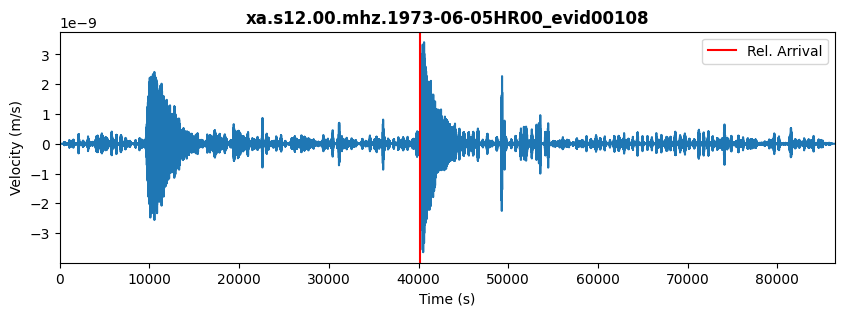

In [8]:
# Read in time steps and velocities
csv_times = np.array(data_cat['time_rel(sec)'].tolist())
csv_data = np.array(data_cat['velocity(m/s)'].tolist())

# Plot the trace!
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(csv_times,csv_data)

# Make the plot pretty
ax.set_xlim([min(csv_times),max(csv_times)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
ax.set_title(f'{test_filename}', fontweight='bold')

# Plot where the arrival time is
arrival_line = ax.axvline(x=arrival_time_rel, c='red', label='Rel. Arrival')
ax.legend(handles=[arrival_line])

What if you wanted to plot in absolute time instead? The operations are very similar, just with a little extra datetime. It takes a bit longer, so we recommend working in relative time to start with!

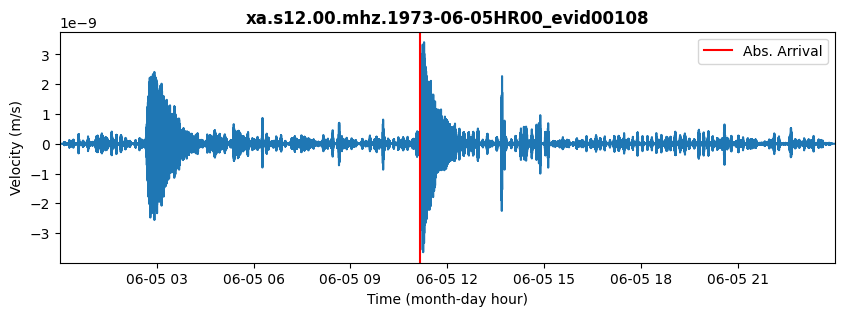

In [9]:
# Read in time steps and velocities
csv_times_dt = []
for absval_str in data_cat['time_abs(%Y-%m-%dT%H:%M:%S.%f)'].values:
    csv_times_dt.append(datetime.strptime(absval_str,'%Y-%m-%dT%H:%M:%S.%f'))

csv_data = np.array(data_cat['velocity(m/s)'].tolist())

# Plot the trace!
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(csv_times_dt,csv_data)

# Make the plot pretty
ax.set_xlim((np.min(csv_times_dt),np.max(csv_times_dt)))
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (month-day hour)')
ax.set_title(f'{test_filename}', fontweight='bold')

# Plot where the arrival time is
arrival_line = ax.axvline(x=arrival_time, c='red', label='Abs. Arrival')
ax.legend(handles=[arrival_line])

### Alternatively: read the miniseed file corresponding to that detection

Same procedure as above, just using the miniseed file.

In [9]:
data_directory = './seismic_detection/data/lunar/training/data/S12_GradeA/'
mseed_file = f'{data_directory}{test_filename}.mseed'
st = read(mseed_file)
# st
test_filename

'xa.s12.00.mhz.1974-07-06HR00_evid00151'

In [10]:
# The stream file also contains some useful header information
st[0].stats

         network: XA
         station: S12
        location: 00
         channel: MHZ
       starttime: 1974-07-06T00:00:00.193000Z
         endtime: 1974-07-07T00:00:01.702434Z
   sampling_rate: 6.625
           delta: 0.1509433962264151
            npts: 572411
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 1136, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 4653056})

In [11]:
# This is how you get the data and the time, which is in seconds
tr = st.traces[0].copy()
tr_times = tr.times()
tr_data = tr.data

# Start time of trace (another way to get the relative arrival time using datetime)
starttime = tr.stats.starttime.datetime
arrival = (arrival_time - starttime).total_seconds()
arrival

51239.807

### Plot the trace and mark the arrival!

Use a similar method to plot the miniseed data and seismic arrival.

Text(0.5, 1.0, 'xa.s12.00.mhz.1973-06-05HR00_evid00108')

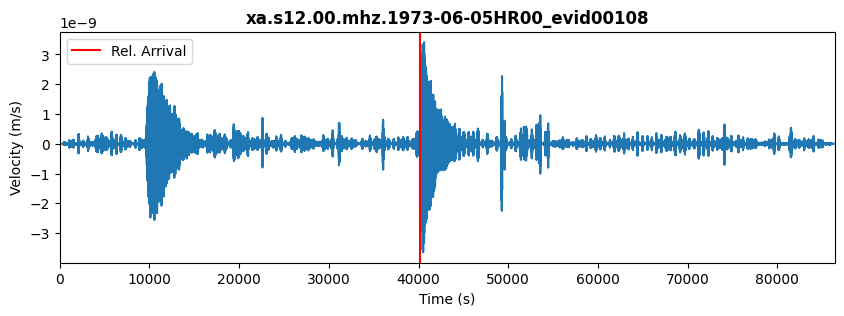

In [14]:
# Initialize figure
fig,ax = plt.subplots(1,1,figsize=(10,3))

# Plot trace
ax.plot(tr_times,tr_data)

# Mark detection
ax.axvline(x = arrival, color='red',label='Rel. Arrival')
ax.legend(loc='upper left')

# Make the plot pretty
ax.set_xlim([min(tr_times),max(tr_times)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
ax.set_title(f'{test_filename}', fontweight='bold')

There are multiple ways that we can do the absolute time using datetime, here is a simple way using the `.timedelta` method

Text(0.5, 1.0, 'xa.s12.00.mhz.1973-06-05HR00_evid00108')

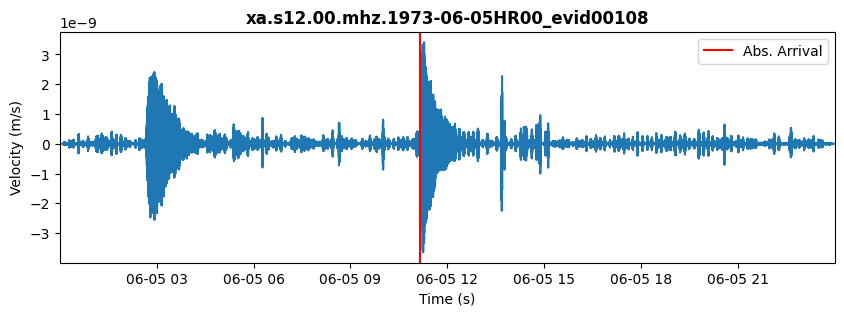

In [15]:
# Create a vector for the absolute time
tr_times_dt = []
for tr_val in tr_times:
    tr_times_dt.append(starttime + timedelta(seconds=tr_val))

# Plot the absolute result
fig,ax = plt.subplots(1,1,figsize=(10,3))

# Plot trace
ax.plot(tr_times_dt,tr_data)

# Mark detection
arrival_line = ax.axvline(x=arrival_time, c='red', label='Abs. Arrival')
ax.legend(handles=[arrival_line])

# Make the plot pretty
ax.set_xlim([min(tr_times_dt),max(tr_times_dt)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
ax.set_title(f'{test_filename}', fontweight='bold')


It's completely up to you whether to work with the CSV file or the miniseed files. We recommend working with the miniseed file as it's a bit faster to run.

## Let's filter the trace

Sometimes, it's useful to filter the trace to bring out particular frequencies. This will change the shape of the data and make it easier to see certain parts of the signal. In this example, we will filter the data using a bandpass filter between 0.01 Hz to 0.5 Hz.

In [16]:
# Set the minimum frequency
minfreq = 0.5
maxfreq = 1.0

# Going to create a separate trace for the filter data
st_filt = st.copy()
st_filt.filter('bandpass',freqmin=minfreq,freqmax=maxfreq)


1 Trace(s) in Stream:
XA.S12.00.MHZ | 1973-06-05T00:00:00.300000Z - 1973-06-05T23:59:59.394340Z | 6.6 Hz, 572395 samples

In [17]:
# To better see the patterns, we will create a spectrogram using the scipy function
# It requires the sampling rate, which we can get from the miniseed header as shown a few cells above
from scipy import signal
from matplotlib import cm
tr_filt = st_filt.traces[0].copy()
tr_times_filt = tr_filt.times()
tr_data_filt = tr_filt.data
f, t, sxx = signal.spectrogram(tr_data_filt, tr_filt.stats.sampling_rate)

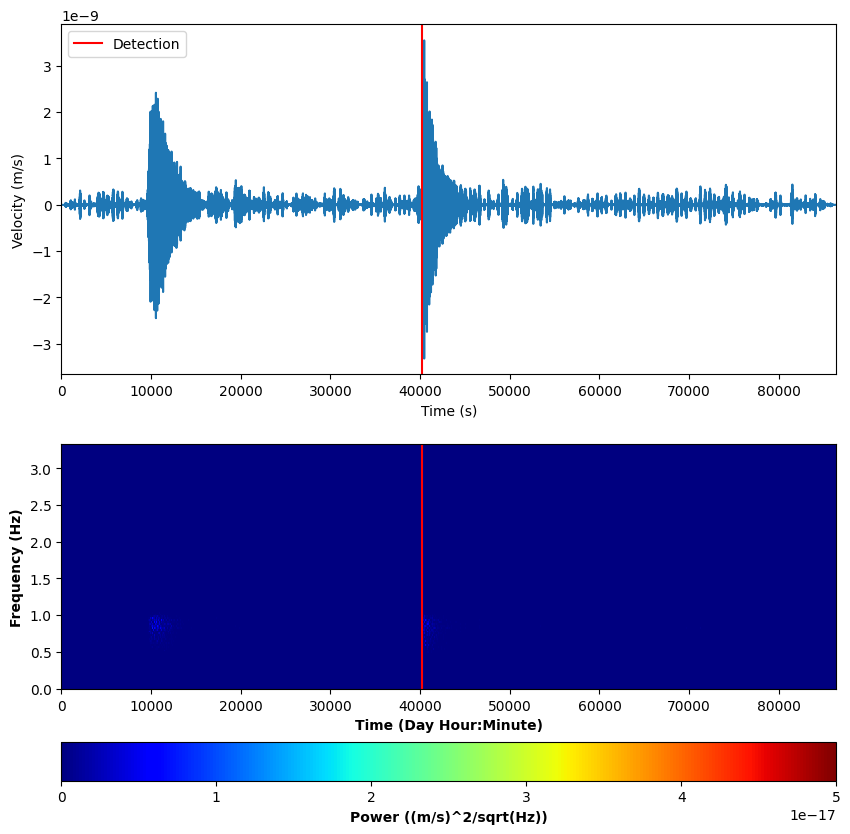

In [18]:
# Plot the time series and spectrogram
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(2, 1, 1)
# Plot trace
ax.plot(tr_times_filt,tr_data_filt)

# Mark detection
ax.axvline(x = arrival, color='red',label='Detection')
ax.legend(loc='upper left')

# Make the plot pretty
ax.set_xlim([min(tr_times_filt),max(tr_times_filt)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')

ax2 = plt.subplot(2, 1, 2)
vals = ax2.pcolormesh(t, f, sxx, cmap=cm.jet, vmax=5e-17)
ax2.set_xlim([min(tr_times_filt),max(tr_times_filt)])
ax2.set_xlabel(f'Time (Day Hour:Minute)', fontweight='bold')
ax2.set_ylabel('Frequency (Hz)', fontweight='bold')
ax2.axvline(x=arrival, c='red')
cbar = plt.colorbar(vals, orientation='horizontal')
cbar.set_label('Power ((m/s)^2/sqrt(Hz))', fontweight='bold')

# Sample short-term average / long-term average (STA/LTA) detection algorithm

A STA/LTA algorithm moves two time windows of two lengths (one short, one long) across the seismic data. The algorithm calculates the average amplitude in both windows, and calculates the ratio between them. If the data contains an earthquake, then the short-term window containing the earthquake will be much larger than the long-term window -- resulting in a detection.

Text(0, 0.5, 'Characteristic function')

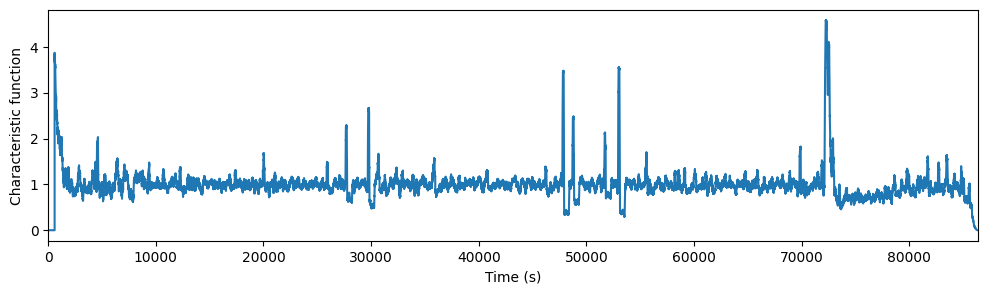

In [ ]:
from obspy.signal.invsim import cosine_taper
from obspy.signal.filter import highpass
from obspy.signal.trigger import classic_sta_lta, plot_trigger, trigger_onset

# Sampling frequency of our trace
df = tr.stats.sampling_rate

# How long should the short-term and long-term window be, in seconds?
sta_len = 120
lta_len = 600

# Run Obspy's STA/LTA to obtain a characteristic function
# This function basically calculates the ratio of amplitude between the short-term
# and long-term windows, moving consecutively in time across the data
cft = classic_sta_lta(tr_data, int(sta_len * df), int(lta_len * df))

# Plot characteristic function
fig,ax = plt.subplots(1,1,figsize=(12,3))
ax.plot(tr_times,cft)
ax.set_xlim([min(tr_times),max(tr_times)])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Characteristic function')

Next, we define the values of the characteristic function (i.e. amplitude ratio between short-term and long-term windows) where we flag a seismic detection. These values are called triggers. There are two types of triggers -- "on" and "off", defined as follows:

1. "on" : If the characteristic function is above this value, then a seismic event begins.
2. "off" : If the characteristic function falls below this value (after an "on" trigger), than a seismic event ends.

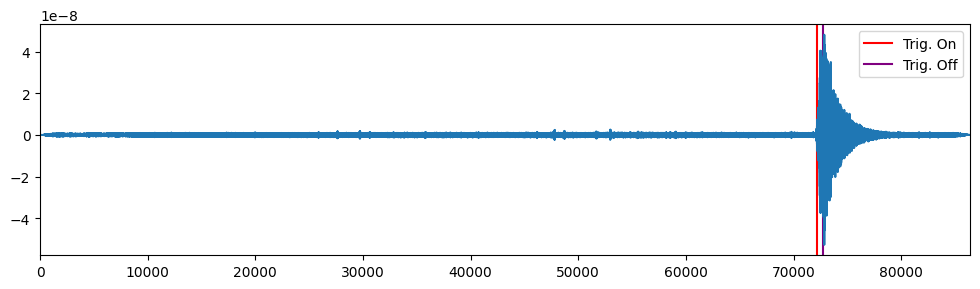

In [ ]:
# Play around with the on and off triggers, based on values in the characteristic function
thr_on = 4
thr_off = 1.5
on_off = np.array(trigger_onset(cft, thr_on, thr_off))
# The first column contains the indices where the trigger is turned "on".
# The second column contains the indices where the trigger is turned "off".

# Plot on and off triggers
fig,ax = plt.subplots(1,1,figsize=(12,3))
for i in np.arange(0,len(on_off)):
    triggers = on_off[i]
    ax.axvline(x = tr_times[triggers[0]], color='red', label='Trig. On')
    ax.axvline(x = tr_times[triggers[1]], color='purple', label='Trig. Off')

# Plot seismogram
ax.plot(tr_times,tr_data)
ax.set_xlim([min(tr_times),max(tr_times)])
ax.legend()

**Note**: You do not have to worry about marking the end of the seismic trace (as you can see, even for us it's not very accurate!). For this challenge, all we care about is the start of the seismic waveform.

## Sample detection export into a catalog!
There are many ways to do this, but we'll show a way to do it using pandas.

In [ ]:
# File name and start time of trace
fname = row.filename
starttime = tr.stats.starttime.datetime

# Iterate through detection times and compile them
detection_times = []
fnames = []
for i in np.arange(0,len(on_off)):
    triggers = on_off[i]
    on_time = starttime + timedelta(seconds = tr_times[triggers[0]])
    on_time_str = datetime.strftime(on_time,'%Y-%m-%dT%H:%M:%S.%f')
    detection_times.append(on_time_str)
    fnames.append(fname)

# Compile dataframe of detections
detect_df = pd.DataFrame(data = {'filename':fnames, 'time_abs(%Y-%m-%dT%H:%M:%S.%f)':detection_times, 'time_rel(sec)':tr_times[triggers[0]]})
detect_df.head()

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec)
0,xa.s12.00.mhz.1970-06-26HR00_evid00009,1970-06-26T20:03:21.323547,72201.207547


This can then be exported to a csv using:

`detect_df.to_csv('output/path/catalog.csv', index=False)`

# Download additional data from Earth-based stations

You may find that you need to download additional data from Earth stations to supplement your models and algorithms. We recommend that you download any events from IRIS (Incorporated Research Institutations for Seismology).

https://www.iris.edu/hq/

**Note**: The organization has been recently renamed to SAGE (Seismological Facility for the Advancement of Geoscience), but all the previous links should still work.

They maintain and curate data from seismic stations all around the world. There are many different ways to get data from them, but I recommend using the utility *PyWeed*:

https://ds.iris.edu/ds/nodes/dmc/software/downloads/pyweed/

We can use the utility to select seismic stations and the earthquake data (or **events**) recorded at those stations.

<img src="https://raw.githubusercontent.com/civilinifr/fc_deeplearning/master/eq_detector_images/station_data_location.png" alt="Drawing" style="width: 1200px;">

For this test case, let's download all of the earthquakes magnitude 3 and above that are within 1 degree distance (approximately 110 km) from a site called PFO (Pinon Flat Observatory) in California. **Location** is a number designating the instrument at a particular site (sites may have multiple instruments), and **channel** is an IRIS code that specifies instrument information.

In short, the first latter refers to the samplerate of the instrument (how many data points it records per second), the second to the type of instrument (certain types of seismometers are better at recording nearby earthquakes while others are more suited for distant earthquakes), and the last to the directional component being recored (most seismometers will record motion across two horizontal directions and the vertical). We will pick the channel HHZ, which refers to a (H) high-samplerate (100 samples per second) (H) strong-motion accelerometer (best resolution for nearby strong earthquakes) recording in the (Z) vertical direction. Once you've selected all the earthquakes, you can download the traces.

An earthquake is composed of the following types of waves (in order): pressure (P-wave), shear (S-wave), and surface (Rayleigh and Love). For our challenge, we are only interested in identifying the start of the earthquake. The IRIS dataset contains P-wave arrivals (onset of the P-wave at the seismometer) for each earthquake. In order to get noise prior to the earthquake arrival, we pick our data traces to span 101 seconds before to 60 seconds past the P-wave arrival:


<img src="https://raw.githubusercontent.com/civilinifr/fc_deeplearning/master/eq_detector_images/selected_seismograms.png" alt="Drawing" style="width: 1200px;">


As you can see from the output list, some of the earthquakes don't record any earthquake data (3.4 Ml 2005-08-31) and others have an incorrect P-wave arrival time (4.0 Ml 2005-08-31). Make sure to go through the earthquakes and remove those types of events from the waveform preview prior to download. For output file type, choose miniseed to match the planetary data (SAC is probably fine too, but the file sizes tend to be a bit bigger).

## Thank you very much for being a part of this challenge! Good luck!!!

--------- DIVIDER FOR ACTUAL PROJECT -----------------------

# Data Cleaning with SNR

Seismic Signal Frequency Range: Understand the frequency range of seismic events you're trying to capture. Planetary seismic signals often occur at specific frequencies, while noise, like wind, tends to be more prominent at lower frequencies.
For example, marsquakes on Mars (InSight mission) are typically detected in the frequency range of 0.1 Hz to 10 Hz, with low-frequency noise due to wind or lander vibrations.

**-> to do: figure out frequencies range**

In [12]:
output_directory = '/content/drive/My Drive/NASA Hackathon/cleaned_data_HPF/'


In [13]:
import numpy as np
from obspy import Stream, Trace, UTCDateTime
from scipy import signal
import matplotlib.pyplot as plt

def highpass_ft_data(st):
  # Assuming st is a Stream object with one Trace
  # Access the first Trace object and extract its data as a NumPy array
  trace = st[0]  # Access the first Trace in the Stream
  st_data = trace.data  # Extract the data from the Trace (this is a NumPy array)

  # Now st_data contains the seismic data and you can process it
  t = np.linspace(0, 1000, len(st_data))  # Time array based on the length of the data

  # Design a high-pass Butterworth filter
  fs = trace.stats.sampling_rate  # Use the sampling rate from the Trace stats
  cutoff = 1  # Cutoff frequency (choose based on seismic data characteristics)
  order = 4  # Order of the filter

  # Create the filter
  sos = signal.butter(order, cutoff, 'hp', fs=fs, output='sos')

  # Apply the filter to the data
  filtered_data = signal.sosfilt(sos, st_data)

  # Create a new Trace for the filtered data
  filtered_trace = Trace()
  filtered_trace.data = filtered_data
  filtered_trace.stats = trace.stats  # Copy the stats from the original Trace
  filtered_trace.stats.network = "FILTERED"  # Change network code if necessary
  filtered_trace.stats.station = "FILTERED"  # Change station code if necessary
  filtered_trace.stats.location = "FILTERED"  # Change location code if necessary
  filtered_trace.stats.channel = "FILTERED"  # Change channel code if necessary
  filtered_trace.stats.starttime = trace.stats.starttime  # Use original start time

  # Create a new Stream object
  filtered_stream = Stream(traces=[filtered_trace])

  # Save the filtered Stream as a MiniSEED file
  filtered_stream.write("filtered_data.mseed", format='MSEED')
  return filtered_stream


In [14]:
# To better see the patterns, we will create a spectrogram using the scipy function
# It requires the sampling rate, which we can get from the miniseed header as shown a few cells above
from scipy import signal
from matplotlib import cm

def plot_spectrogram(filtered_stream, name):
  tr_filt = filtered_stream.traces[0].copy()
  tr_times_filt = tr_filt.times()
  tr_data_filt = tr_filt.data
  f, tx, sxx = signal.spectrogram(tr_data_filt, tr_filt.stats.sampling_rate)

  # Plot the time series and spectrogram
  fig = plt.figure(figsize=(10, 10))
  ax = plt.subplot(2, 1, 1)
  # Plot trace
  ax.plot(tr_times_filt,tr_data_filt)

  # Mark detection
  # ax.axvline(x = arrival, color='red',label='Detection')
  # ax.legend(loc='upper left')

  # # Make the plot pretty
  # ax.set_xlim([min(tr_times_filt),max(tr_times_filt)])
  # ax.set_ylabel('Velocity (m/s)')
  # ax.set_xlabel('Time (s)')

  ax2 = plt.subplot(2, 1, 2)
  vals = ax2.pcolormesh(tx, f, sxx, cmap=cm.jet, vmax=5e-17)
  ax2.set_xlim([min(tr_times_filt),max(tr_times_filt)])
  ax2.set_xlabel(f'Time (Day Hour:Minute)', fontweight='bold')
  ax2.set_ylabel('Frequency (Hz)', fontweight='bold')
  ax2.axvline(x=arrival, c='red')
  cbar = plt.colorbar(vals, orientation='horizontal')
  cbar.set_label('Power ((m/s)^2/sqrt(Hz))', fontweight='bold')

  # plt.savefig(f'{output_directory}{name}_spectrogram.png')  # Save the figure
  # plt.close()



In [15]:
# def plot_seismic_signal(st, name):
#   trace = st[0]
#   data = trace.data
#   sampling_rate = trace.stats.sampling_rate

#   # Create a time axis
#   time = np.linspace(0, len(data) / sampling_rate, num=len(data))

#   # Plot the seismic signal in the time domain
#   plt.figure(figsize=(10, 6))
#   plt.plot(time, data, color='blue')
#   plt.title("Seismic Signal in the Time Domain")
#   plt.xlabel("Time (s)")
#   plt.ylabel("Amplitude")
#   plt.grid(True)
#   plt.show()

#   # Plot the spectrogram
#   plt.figure(figsize=(10, 6))
#   plt.specgram(data, NFFT=1024, Fs=sampling_rate, noverlap=512, cmap='jet')
#   plt.title("Spectrogram of the Seismic Signal")
#   plt.xlabel("Time (s)")
#   plt.ylabel("Frequency (Hz)")
#   plt.colorbar(label="Power/Frequency (dB/Hz)")
#   plt.show()


#   # plt.savefig(f'{output_directory}{name}.png')  # Save the figure
#   # plt.close()
def plot_filtered_signal_with_clusters(st):
    # Apply the high-pass filter
    filtered_stream = highpass_ft_data(st)
    trace = filtered_stream[0]
    filtered_data = trace.data
    fs = trace.stats.sampling_rate

    # Create a time axis for plotting
    time = np.linspace(0, len(filtered_data) / fs, num=len(filtered_data))

    # Plot the filtered seismic signal in the time domain
    plt.figure(figsize=(10, 6))
    plt.plot(time, filtered_data, label="Filtered Signal", color='blue')
    plt.title("Filtered Seismic Signal with Frequency Clusters")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Calculate the spectrogram of the filtered data
    f, t, Sxx = signal.spectrogram(filtered_data, fs=fs, nperseg=1024, noverlap=512)

    # Identify clusters where frequency < 200 Hz
    freq_threshold = 200
    low_freq_mask = f < freq_threshold
    low_freq_times = t[np.any(Sxx[low_freq_mask, :] > 0, axis=0)]

    # Mark these low-frequency clusters on the filtered signal plot
    #for lt in low_freq_times:
    #    plt.axvline(x=lt, color='red', linestyle='--', label='Cluster < 200 Hz')

    # Prevent duplicate labels in the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.show()

    # Plot the spectrogram separately
    plt.figure(figsize=(10, 6))
    plt.specgram(filtered_data, NFFT=1024, Fs=fs, noverlap=512, cmap='jet')
    plt.title("Spectrogram of Filtered Seismic Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="Power/Frequency (dB/Hz)")
    plt.show()

# Example usage
# Assuming `st` is a Stream object with seismic data
# st = ...  # Load your Stream object here
# plot_filtered_signal_with_clusters(st)

In [16]:
# def plot_seismic_signal(st, name):
#   trace = st[0]
#   data = trace.data
#   sampling_rate = trace.stats.sampling_rate

#   # Create a time axis
#   time = np.linspace(0, len(data) / sampling_rate, num=len(data))

#   # Plot the seismic signal in the time domain
#   plt.figure(figsize=(10, 6))
#   plt.plot(time, data, color='blue')
#   plt.title("Seismic Signal in the Time Domain")
#   plt.xlabel("Time (s)")
#   plt.ylabel("Amplitude")
#   plt.grid(True)
#   plt.show()

#   # Plot the spectrogram
#   plt.figure(figsize=(10, 6))
#   plt.specgram(data, NFFT=1024, Fs=sampling_rate, noverlap=512, cmap='jet')
#   plt.title("Spectrogram of the Seismic Signal")
#   plt.xlabel("Time (s)")
#   plt.ylabel("Frequency (Hz)")
#   plt.colorbar(label="Power/Frequency (dB/Hz)")
#   plt.show()


#   # plt.savefig(f'{output_directory}{name}.png')  # Save the figure
#   # plt.close()
def plot_filtered_signal_with_clusters(st):
    # Apply the high-pass filter
    filtered_stream = highpass_ft_data(st)
    trace = filtered_stream[0]
    filtered_data = trace.data
    fs = trace.stats.sampling_rate

    # Create a time axis for plotting
    time = np.linspace(0, len(filtered_data) / fs, num=len(filtered_data))

    # Plot the filtered seismic signal in the time domain
    plt.figure(figsize=(10, 6))
    plt.plot(time, filtered_data, label="Filtered Signal", color='blue')
    plt.title("Filtered Seismic Signal with Frequency Clusters")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Calculate the spectrogram of the filtered data
    f, t, Sxx = signal.spectrogram(filtered_data, fs=fs, nperseg=1024, noverlap=512)

    # Identify clusters where frequency < 200 Hz
    freq_threshold = 200
    low_freq_mask = f < freq_threshold
    low_freq_times = t[np.any(Sxx[low_freq_mask, :] > 0, axis=0)]

    # Mark these low-frequency clusters on the filtered signal plot
    for lt in low_freq_times:
        plt.axvline(x=lt, color='red', linestyle='solid', label='Cluster < 200 Hz')

    # Prevent duplicate labels in the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.show()

    # Plot the spectrogram separately
    plt.figure(figsize=(10, 6))
    plt.specgram(filtered_data, NFFT=1024, Fs=fs, noverlap=512, cmap='jet')
    plt.title("Spectrogram of Filtered Seismic Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="Power/Frequency (dB/Hz)")
    plt.show()

# Example usage
# Assuming `st` is a Stream object with seismic data
# st = ...  # Load your Stream object here
# plot_filtered_signal_with_clusters(st)

In [18]:
# prompt: create an analyze spectrogram function that takes in a spectrogram, logs it, and then returns a list of time stamps with high power values

import numpy as np

def analyze_spectrogram(spectrogram, threshold=0.95, time_axis=None):
  """Analyzes a spectrogram to find time stamps with high power values.

  Args:
    spectrogram: A 2D numpy array representing the spectrogram.
    threshold: The threshold for considering a power value as high (0.0-1.0).
    time_axis: (Optional) The time axis corresponding to the spectrogram.

  Returns:
    A list of time stamps (or indices if time_axis is not provided)
    where high power values are detected.
  """

  # Log the spectrogram
  #log_spectrogram = np.log(spectrogram + 1e-10)  # Add a small value to avoid log(0)
  #print(spectrogram)

  # Find the maximum power value for each time point
  max_power_per_time = np.max(spectrogram, axis=0)

  # Find indices where the power exceeds the threshold
  high_power_indices = np.where(max_power_per_time > np.percentile(max_power_per_time, (1 - threshold) * 100))[0]

  if time_axis is not None:
    # Return corresponding time stamps
    high_power_times = [time_axis[i] for i in high_power_indices]
    return high_power_times
  else:
    # Return indices if time_axis is not provided
    return high_power_indices


In [19]:
# prompt: generate spectrogram graph marking the time corresponding to the largest power/frequency value with solid red line on the filtered seismic signal graph

import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
from google.colab import drive
from scipy import signal
from matplotlib import cm
from obspy.signal.invsim import cosine_taper
from obspy.signal.filter import highpass
from obspy.signal.trigger import classic_sta_lta, plot_trigger, trigger_onset
from obspy import Stream, Trace, UTCDateTime

# Assuming you have a filtered_stream object containing the filtered seismic data
def plot_filtered_signal_with_spectrogram(filtered_stream, name):
    tr_filt = filtered_stream.traces[0].copy()
    tr_times_filt = tr_filt.times()
    tr_data_filt = tr_filt.data
    fs = tr_filt.stats.sampling_rate

    # Calculate the spectrogram
    f, t, Sxx = signal.spectrogram(tr_data_filt, fs=fs, nperseg=1024, noverlap=512)

    # Find the time corresponding to the maximum power/frequency value
    '''
    max_power_index = np.argmax(Sxx)
    max_freq_index = max_power_index // Sxx.shape[1]
    max_time_index = max_power_index % Sxx.shape[1]
    max_time = t[max_time_index] - 661
    '''
    time_stamp_indices = analyze_spectrogram(Sxx, 0.02, t)
    #print(time_stamp_indices)

    # Plot the time series and spectrogram
    fig = plt.figure(figsize=(10, 10))
    ax = plt.subplot(2, 1, 1)
    # Plot trace
    ax.plot(tr_times_filt, tr_data_filt)

    # Mark the time corresponding to the largest power/frequency value with a solid pink line
    for max_time in time_stamp_indices:
      ax.axvline(x=max_time, c='red', linestyle='solid')


    ax2 = plt.subplot(2, 1, 2)
    vals = ax2.pcolormesh(t, f, Sxx, cmap=cm.jet)
    ax2.set_xlabel(f'Time (s)', fontweight='bold')
    ax2.set_ylabel('Frequency (Hz)', fontweight='bold')
    # Mark the time corresponding to the largest power/frequency value with a solid red line
    for max_time in time_stamp_indices:
      ax2.axvline(x=max_time, c='red', linestyle='solid')
    cbar = plt.colorbar(vals, orientation='horizontal')
    cbar.set_label('Power ((m/s)^2/sqrt(Hz))', fontweight='bold')
    #plt.show()
    plt.savefig(f'{output_directory}{name}.png')  # Save the figure
    plt.close()


In [20]:

for filename in os.listdir(data_directory):
    if filename.endswith('.mseed'):
        mseed_file = os.path.join(data_directory, filename)
        print(mseed_file)
        st = read(mseed_file)  # Read the seismic data

        # Apply high-pass filter
        filtered_stream = highpass_ft_data(st)

        # Plot and save the figures
        plot_filtered_signal_with_spectrogram(filtered_stream, filename)
        # plot_spectrogram(filtered_stream, filename)

#  Apply high-pass filter
#filtered_stream = highpass_ft_data(st)

# Plot and save the figures
#plot_filtered_signal_with_clusters(filtered_stream)
#plot_filtered_signal_with_spectrogram(filtered_stream, "?")

./seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-03-26HR00_evid00004.mseed
./seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-01-19HR00_evid00002.mseed
./seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-03-25HR00_evid00003.mseed
./seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-04-26HR00_evid00007.mseed
./seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-06-15HR00_evid00008.mseed
./seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-04-25HR00_evid00006.mseed
./seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-06-26HR00_evid00009.mseed
./seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-07-20HR00_evid00010.mseed
./seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-07-20HR00_evid00011.mseed
./seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-11-12HR00_evid00

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
